In [1]:
import sys,os,pickle,copy
sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
import numpy as np
import numpy
import pandas as pd
import scipy
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
from importlib import reload
import seaborn as sns

import preprocess as prep

from sklearn.decomposition import NMF

import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'
import matplotlib.pyplot as plt

import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

<module 'nmf_analysis' from '/mnt/home/szheng/projects/nmf_analysis/nmf_analysis.py'>

In [2]:
sess_name="e15_13f1_220117"#'e13_26m1_210913'#
data_dir_full = "/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117"#'/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913' #
py_data_dir = os.path.join(data_dir_full,"py_data")
fr_ = pickle.load(open(os.path.join(py_data_dir,'fr.p'),'rb'))
pos_bins = fr_['pos_bins']['lin']
bin_to_lin=numpy.concatenate([pos_bins[:-1,None],pos_bins[1:,None]],axis=1).mean(axis=1)

fr_df=  fr_['df']
fr_pyr = fr_['df']['pyr']
fr_int = fr_['df']['int']
fr_map_trial = pickle.load(open(os.path.join(py_data_dir,'fr_map.p'),'rb'))['fr_map_trial']
fr_map_avg=pickle.load(open(os.path.join(py_data_dir,'fr_map.p'),'rb'))['fr_map']
cell_cols = fr_['cell_cols']
cell_cols_pyr=np.array(cell_cols['pyr'],dtype=object)
cell_cols_int =np.array(cell_cols['int'],dtype=object)


In [3]:
data_dir_full = data_dir_full
to_return=prep.load_stuff(data_dir_full)

cell_metrics=to_return['cell_metrics']
behavior=to_return['behavior']
ripple_events=to_return['ripple_events']
mergepoints=to_return['mergepoints']
cell_type_mask=to_return['cell_type_mask']
pyr_uid=to_return['pyr_uid']

trial_ind_d = {ch:np.nonzero(behavior.trials.visitedArm==ch)[0] for ch in [0,1]}
dt = np.diff(behavior.timestamps).mean()

In [4]:
fr_filtered_d={}
fr_to_be_nmfed_d={}
for ct,fr in fr_df.items():
    fr_filtered_d[ct] = copy.copy(fr.query("(speed>=1.)"))
    # fr_filtered[cell_cols_pyr] = fr_filtered[cell_cols_pyr] / dt
    fr_mean_trial_type = fr_filtered_d[ct].groupby(['visitedArm','trial']).mean()[cell_cols[ct]]
    fr_mean_all = fr_filtered_d[ct].groupby('trial').mean()[cell_cols[ct]]

    fr_to_be_nmfed_d[ct] = {'0':fr_mean_trial_type.loc[0],'1':fr_mean_trial_type.loc[1],'both':fr_mean_all}

In [5]:
reload(na)
n_compo = 4
W_d_d,W_sorted_d_d,W_inds_d_d, factor_assignment_d_d, H_sorted_d_d, X_sorted_d_d, X_recon_sorted_d_d, mask_joint_d_d, non_na_original_ind_joint_d_d={},{},{},{},{},{},{},{},{}
for ct, fr_to_be_nmfed in fr_to_be_nmfed_d.items():
    W_d_d[ct],W_sorted_d_d[ct],W_inds_d_d[ct], factor_assignment_d_d[ct], H_sorted_d_d[ct], X_sorted_d_d[ct], X_recon_sorted_d_d[ct], mask_joint_d_d[ct], non_na_original_ind_joint_d_d[ct] = na.nmf_multiple_fr_df_once(fr_to_be_nmfed,n_compo)
    



/mnt/home/szheng/projects/nmf_analysis/nmf_analysis.py:38: RuntimeWarning: invalid value encountered in true_divide
  X_normed = X / row_norm_constant


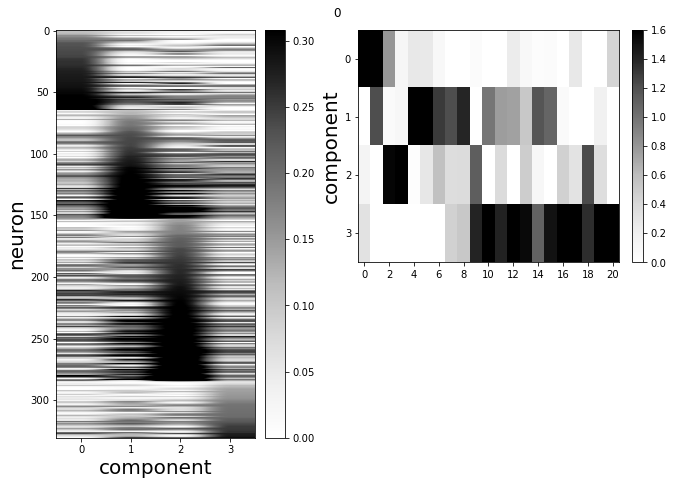

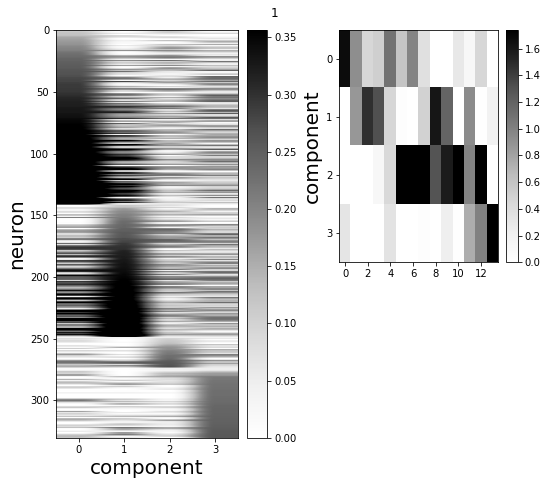

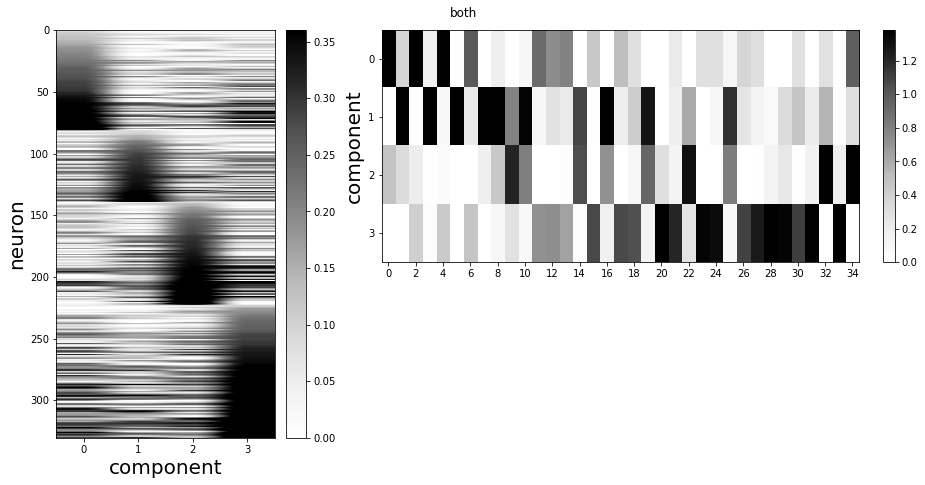

In [19]:
reload(nmfp)
ct='pyr'
for data_key in W_sorted_d_d[ct].keys():
    fig,axd=nmfp.plot_wh(W_sorted_d_d[ct][data_key],H_sorted_d_d[ct][data_key])
    fig.suptitle(data_key)

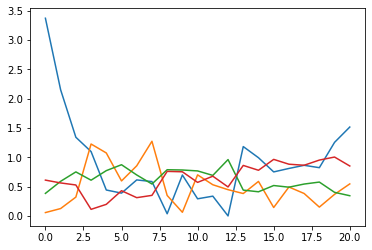

In [250]:
plt.plot(H_sorted_d_d['int']['0'].T)

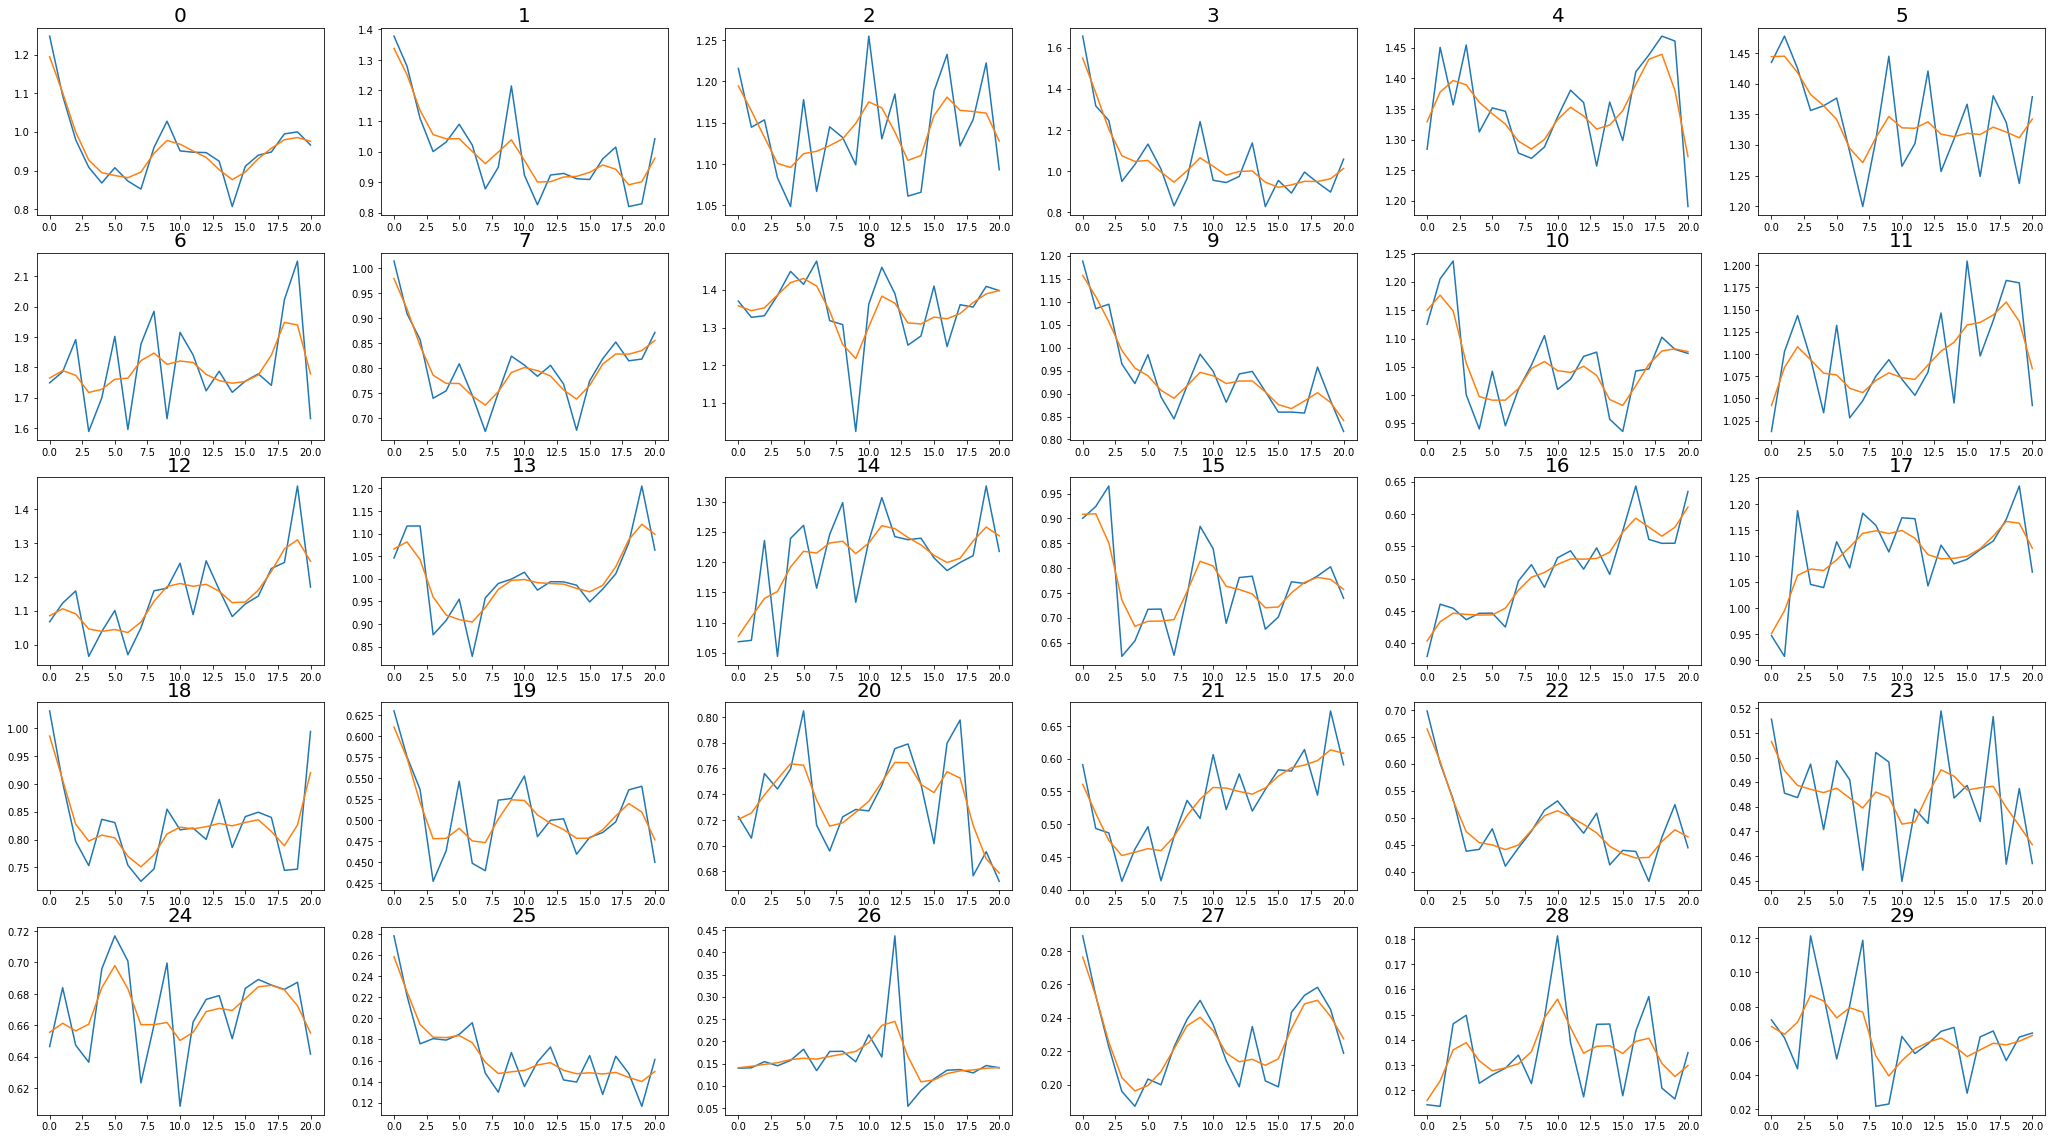

In [28]:
sample_inds_within_W_sorted = np.arange(30)

fig,axs=nmfp.plot_example_fr_across_trials(fr_to_be_nmfed_d[ct]['0'],sample_inds_within_W_sorted,non_na_original_ind_joint_d_d[ct])


<AxesSubplot:xlabel='trial'>

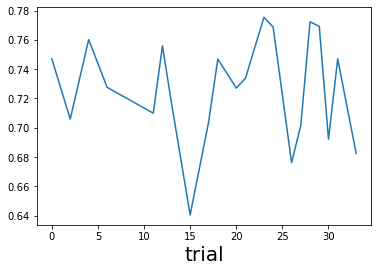

In [248]:
fr_to_be_nmfed_d['int']['0'].median(axis=1).plot()


<AxesSubplot:xlabel='trial'>

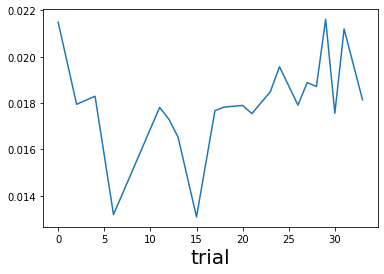

In [249]:
fr_to_be_nmfed_d['pyr']['0'].median(axis=1).plot()

In [45]:
fr_to_be_nmfed_d[ct]['0'].columns[16]

'unit_17'

In [18]:
cell_type_mask

array([3.50900000e-01, 1.01736667e+00, 1.15046667e+00, ...,
       2.55003148e+04, 2.55020381e+04, 2.55020929e+04])

(0.0, 10.0)

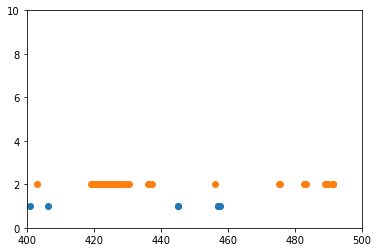

In [31]:
int_spk=spike_times_in_pre[~cell_type_mask][-1]

pyr_spk=spike_times_in_pre[80]

plt.scatter(int_spk,np.ones(len(int_spk)))
plt.scatter(pyr_spk,2*np.ones(len(pyr_spk)))
k=500
plt.xlim([k-100,k])
plt.ylim([0,10])

In [7]:
import preprocess as prep

In [ ]:
# prep.get_spike_times_in_ripple_l(cell_metrics['spikes']['times'],)

In [203]:
# spk_times=cell_metrics['spikes']['times']

In [ ]:
# tau=np.subtract.outer(spike_times_in_pre[0][0],spike_times_in_pre[1][0])

In [74]:
mergepoints['timestamps'][0]

array([   0.        , 6572.41596667])

In [21]:
spike_times_in_pre,_ = dpn.select_time_in_intervals_all(cell_metrics['spikes']['times'],mergepoints['timestamps'][0])


In [69]:
# fr_pre,bins = dpn.bin_spikes(cell_metrics['spikes']['times'],beg_end = mergepoints['timestamps'][0],bin_info=0.001)
fr_pre,bins = dpn.bin_spikes(cell_metrics['spikes']['times'],beg_end = (0,6000),bin_info=1.,smooth=3)



In [9]:
corr_d = {}
for bin_info_ms in [10,100,1000]:
    bin_info = bin_info_ms / 1000
    fr_pre,bins = dpn.bin_spikes(cell_metrics['spikes']['times'],beg_end = (0,6000),bin_info=bin_info,smooth=3)
    corr_d[bin_info_ms] = np.corrcoef(fr_pre)

In [57]:
# corr_10 = np.corrcoef(fr_pre)

# corr_100 = np.corrcoef(fr_pre)

# corr_1000 = np.corrcoef(fr_pre)

In [12]:
z1=scipy.stats.zscore(fr_pre[80])
max_index_l = []
max_cc_l = []
for j in range(fr_pre.shape[0]):
    z2 = scipy.stats.zscore(fr_pre[j])

    cc = scipy.signal.correlate(z1,z2) / len(z1)
    ind=np.argmax(cc)
    max_cc_l.append(cc[ind])
    max_index_l.append(ind)
#     plt.plot(cc[int(len(cc)//2-1):int(len(cc)//2+2)])
# plt.xlim([50000,70000])
print()


In [84]:
# use correlation to predict loadings
corr_10[cell_type_mask][:,~cell_type_mask].shape

(333, 43)

In [8]:
corr_d.keys()

dict_keys([0.01, 0.1, 1.0])

In [48]:
k='0'
W = W_d_d['pyr'][k]
bin_ms = 10
corr_as_predictors = corr_d[bin_ms][cell_type_mask][:,~cell_type_mask][non_na_original_ind_joint_d_d['pyr']]

In [11]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [24]:
reg_res_l = []
corr_as_predictors_const = sm.add_constant(corr_as_predictors)
for k in range(W.shape[1]):
    res=sm.OLS(W[:,k],corr_as_predictors_const).fit()
    reg_res_l.append(res)

In [25]:
for res in reg_res_l:
    print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     1.687
Date:                Tue, 30 Aug 2022   Prob (F-statistic):            0.00694
Time:                        15:37:16   Log-Likelihood:                 336.49
No. Observations:                 331   AIC:                            -585.0
Df Residuals:                     287   BIC:                            -417.7
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0716      0.016      4.430      0.0

In [43]:
res= sm.OLS(W[:,0],sm.add_constant(W[:,[3]])).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.04228
Date:                Tue, 30 Aug 2022   Prob (F-statistic):              0.837
Time:                        15:50:15   Log-Likelihood:                 299.22
No. Observations:                 331   AIC:                            -594.4
Df Residuals:                     329   BIC:                            -586.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1465      0.010     14.336      0.0

In [ ]:
# corr_as_predictors = sm.add_constant(corr_as_predictors)

In [35]:
n_shuffle = 500
r2_l = []
k = 1
for i in range(n_shuffle):
    shuffle_W_inds = np.random.permutation(W.shape[0])
    res=sm.OLS(W[shuffle_W_inds,k],corr_as_predictors_const).fit()
    r2 = res.rsquared_adj
    r2_l.append(r2)
r2_l = np.array(r2_l)

In [37]:
np.quantile(r2_l,0.995)

0.08560106861540329

(array([  4.,  36.,  71., 116., 115.,  84.,  46.,  22.,   3.,   3.]),
 array([-0.08286857, -0.06376275, -0.04465694, -0.02555113, -0.00644531,
         0.0126605 ,  0.03176631,  0.05087213,  0.06997794,  0.08908375,
         0.10818957]),
 <BarContainer object of 10 artists>)

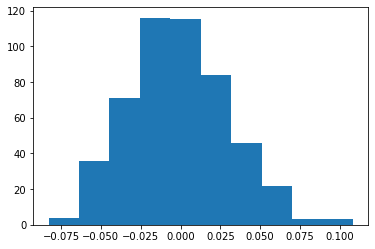

In [36]:
plt.hist(r2_l)

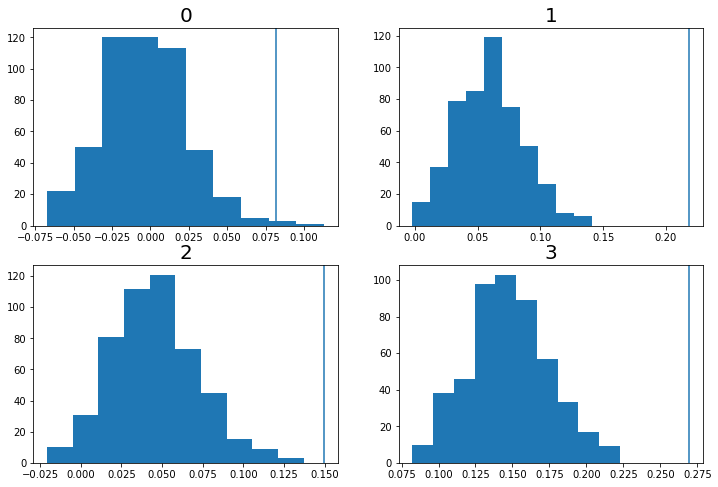

In [191]:
# shuffle columns of the independent var, independently for each sample
n_shuffle = 500

# k = 1
fig,axs = ph.subplots_wrapper(n_compo,return_axs=True)

nfeats=corr_as_predictors.shape[1]
for k in range(n_compo):
    r2_l = []
    for i in range(n_shuffle):
        corr_as_predictors_reordered = np.squeeze(list(map(lambda y:y[np.random.choice(nfeats,size=(nfeats),replace=False)],corr_as_predictors)))
        res=sm.OLS(W[:,k],sm.add_constant(corr_as_predictors_reordered)).fit()
        r2 = res.rsquared_adj
        r2_l.append(r2)
    r2_l = np.array(r2_l)
    axs.ravel()[k].hist(r2_l)
    axs.ravel()[k].axvline(reg_res_l[k].rsquared_adj)
    axs.ravel()[k].set_title(k)

In [73]:
from sklearn.cross_decomposition import CCA, PLSRegression

In [195]:
n_red_compo=4
cca=CCA(n_components=n_red_compo)
pls = PLSRegression(n_components=n_red_compo)

In [215]:
X_c,Y_c=cca.fit_transform(corr_as_predictors,W)
X_p,Y_p = pls.fit_transform(corr_as_predictors,W)

In [216]:
pls_score_original=pls.score(corr_as_predictors,W)

cca_score_original = cca.score(corr_as_predictors,W)
print(pls_score_original)
print(cca_score_original)

0.1310300785194246
0.1581342130485472


In [198]:
# shuffle the samples in the target but not the data
n_shuffle = 500
r2_l = []
k = 1
for i in range(n_shuffle):
    shuffle_W_inds = np.random.permutation(W.shape[0])
    r2=pls.fit(corr_as_predictors,W[shuffle_W_inds,:]).score(corr_as_predictors,W[shuffle_W_inds,:])
    r2_l.append(r2)
r2_l = np.array(r2_l)


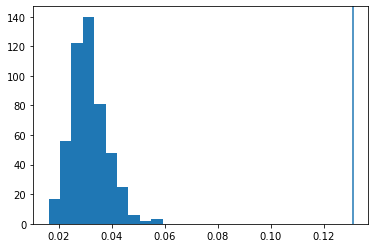

In [199]:
plt.hist(r2_l)
plt.axvline(pls_score_original)

In [200]:
# shuffle columns of the dependent var, independently for each sample
n_shuffle = 500
r2_l = []
k = 1
all_compo_permutations = itertools.permutations(range(W.shape[1]))
for i in range(n_shuffle):
    
    all_compo_permutations = np.array(list(itertools.permutations(range(W.shape[1]))))
    inds_all = np.arange(all_compo_permutations.shape[0])
    inds_chosen=np.random.choice(inds,W.shape[0])
    shuffle_W_inds  = all_compo_permutations[inds_chosen]
    W_reordered = np.array(list(map(lambda x,y:y[x],shuffle_W_inds,W)))
    r2=pls.fit(corr_as_predictors,W_reordered).score(corr_as_predictors,W_reordered)
    r2_l.append(r2)
r2_l = np.array(r2_l)


In [149]:
np.quantile(r2_l,1) # 0.13 is the original

0.11808077224468305

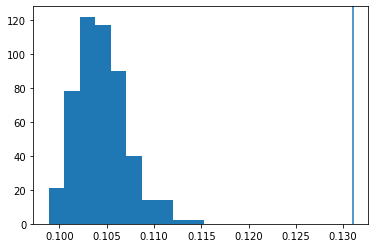

In [201]:
plt.hist(r2_l)
plt.axvline(pls_score_original)
# plt.xlim([1.3,1.4])

In [217]:
# shuffle columns of the independent var, independently for each sample
n_shuffle = 500
r2_l = []
nfeats=corr_as_predictors.shape[1]
for i in range(n_shuffle):
    
    corr_as_predictors_reordered = np.squeeze(list(map(lambda y:y[np.random.choice(nfeats,size=(nfeats),replace=False)],corr_as_predictors)))
#     r2=pls.fit(corr_as_predictors_reordered,W).score(corr_as_predictors_reordered,W)
    r2=cca.fit(corr_as_predictors_reordered,W).score(corr_as_predictors_reordered,W)
    r2_l.append(r2)
r2_l = np.array(r2_l)


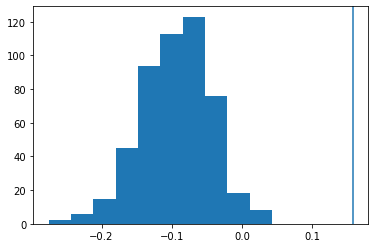

In [219]:
plt.hist(r2_l)
# plt.axvline(pls_score_original)
plt.axvline(cca_score_original)

In [222]:
r2=pls.fit(corr_as_predictors_reordered,W).score(corr_as_predictors_reordered,W)

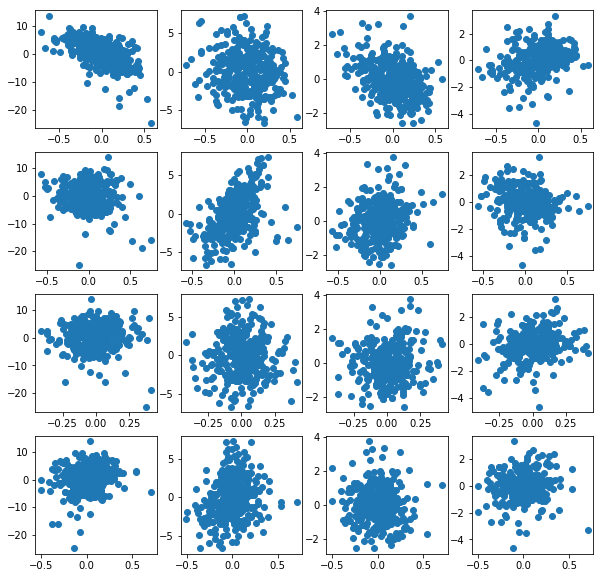

In [93]:
fig,axs = plt.subplots(n_red_compo,n_red_compo,figsize=(10,10))
for i in range(n_red_compo):
    for j in range(n_red_compo):
        axs[i,j].scatter(X_c[:,i],X_p[:,j])

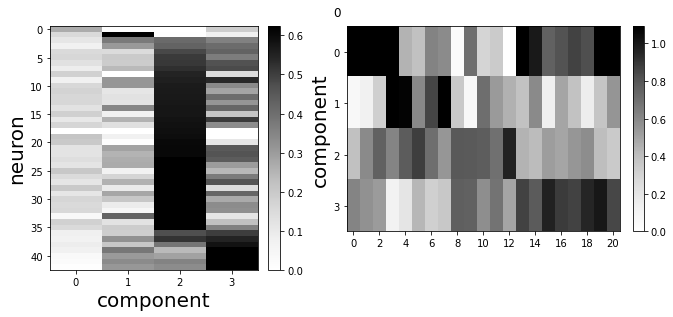

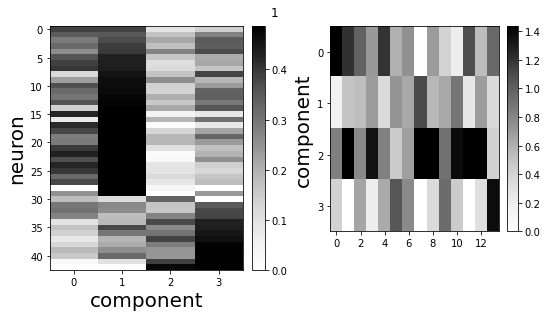

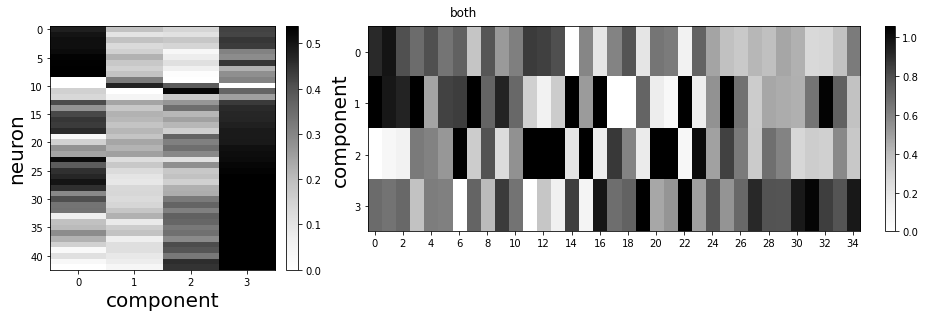

In [21]:
reload(nmfp)
ct='int'
for data_key in W_sorted_d_d[ct].keys():
    fig,axd=nmfp.plot_wh(W_sorted_d_d[ct][data_key],H_sorted_d_d[ct][data_key],factor_neuron_ratio=10)
    fig.suptitle(data_key)